In [15]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc

from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, classification_report

In [16]:
torch.set_printoptions(profile="full")

In [17]:
import torch.nn as nn

# Define model
class Perceptron(torch.nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.layer = torch.nn.Linear(input_size, 8)
        self.layer2 = torch.nn.Linear(8, 8)
        self.sigmoid = torch.nn.Sigmoid()
        self.layer3 = torch.nn.Linear(8, 1)
        self.sigmoid3 = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        x = self.layer3(x)
        x = self.sigmoid3(x)
        return x

In [18]:
import torch
import torch.nn as nn

class BrokenPerceptron(nn.Module):
    def __init__(self, input_size):
        super(BrokenPerceptron, self).__init__()
        self.layer = nn.Linear(input_size, 1)
        self.layer2 = nn.Linear(1, 1)
        self.sigmoid = nn.Sigmoid()
        self.layer3 = nn.Linear(1, 1)
        self.sigmoid3 = nn.Sigmoid()
        self.layer4 = nn.Linear(1, 1)
        self.sigmoid4 = nn.Sigmoid()
        self.layer5 = nn.Linear(1, 1)
        self.sigmoid5 = nn.Sigmoid()
        self.layer6 = nn.Linear(1, 1)
        self.sigmoid6 = nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        x = self.layer3(x)
        x = self.sigmoid3(x)
        x = self.layer4(x)
        x = self.sigmoid4(x)
        x = self.layer5(x)
        x = self.sigmoid5(x)
        x = self.layer6(x)
        x = self.sigmoid6(x)
        return x

Градиенты по слоям:
layer.weight: tensor([[ 2.3373e-04,  1.3561e-04],
        [-1.5418e-04,  3.0005e-04],
        [ 2.7905e-04, -4.4814e-04],
        [-8.4534e-05, -7.0700e-05],
        [ 3.2921e-04,  7.0965e-04],
        [ 1.2471e-04, -6.8777e-05],
        [-8.8625e-05,  5.6331e-04],
        [ 6.8509e-05,  8.4088e-04]])
layer.bias: tensor([-0.0005,  0.0002, -0.0002,  0.0004, -0.0006, -0.0003, -0.0002, -0.0004])
layer2.weight: tensor([[-4.7606e-04,  1.5089e-03, -1.1140e-03, -1.2795e-03,  3.5475e-04,
          1.7949e-03, -3.0992e-04,  5.5612e-04],
        [ 2.4798e-04, -2.0212e-04, -2.3372e-04,  4.7164e-04, -4.6202e-05,
         -8.7383e-05,  3.8711e-04, -8.3701e-06],
        [-3.8286e-04,  7.8907e-04, -5.6701e-04, -5.6897e-04,  2.9681e-04,
          8.8534e-04, -8.6389e-05,  1.1980e-04],
        [-3.8358e-05, -1.4761e-05,  9.4258e-05, -5.0254e-05, -1.1887e-06,
         -5.1956e-05, -7.0128e-05, -2.3715e-05],
        [-9.2780e-04,  7.8132e-04, -8.7720e-04,  3.0656e-04,  9.1208e-04,
   

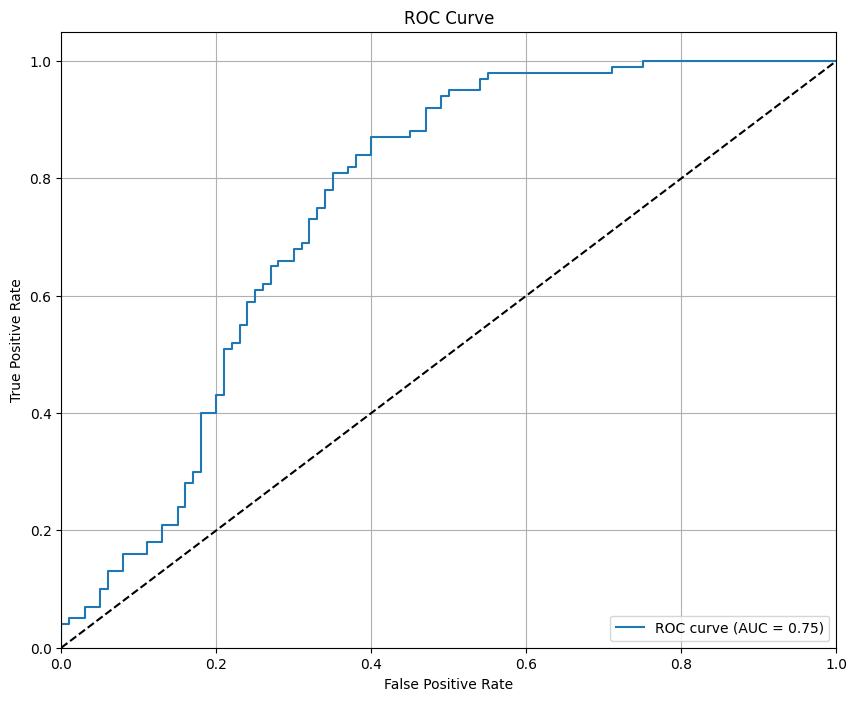

In [30]:
from networks.gradient_analysis import extract_gradients_by_layer

X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# Initialize model, loss, and optimizer
model = Perceptron(X_train.shape[1])
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 50
losses = []

for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)

    # Calculate loss
    loss = criterion(outputs.squeeze(), y_train)
    losses.append(loss.item())

    # Zero gradients
    optimizer.zero_grad()

    # Backward pass (here the gradients are actually computed)
    loss.backward()

    extract_gradients_by_layer(model)

    # Update weights
    optimizer.step()

# Evaluation
model.eval()

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = (y_pred.squeeze() > 0.5).float()
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test.numpy(), y_pred.squeeze().numpy())
    roc_auc = auc(fpr, tpr)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_class))

    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')

    # Plot ROC curve
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [20]:
def compute_eigen_of_hessian(hessian):
    eigenvalues, _ = torch.linalg.eigh(hessian)
    return eigenvalues

In [21]:
def visualize_curvature(hessian):
    eigenvalues = compute_eigen_of_hessian(hessian)
    plt.plot(eigenvalues.detach().cpu().numpy())
    plt.title("Собственные значения Гессиана")
    plt.xlabel("Индекс")
    plt.ylabel("Собственное значение")
    plt.show()

In [22]:
from hessian.hessian import HessianCalculator

hc = HessianCalculator(model, criterion)

/home/maxim/git/net-arch-research/hessian/hessian.py:16: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.make_functional` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.func.functional_call` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  self.fmodel, self.params = make_functional(model)


tensor([[ 5.5750e-03, -2.1656e-03,  4.0234e-03, -1.5629e-03,  3.0823e-03,
         -1.1973e-03, -3.8339e-03,  1.4893e-03, -4.7738e-04,  1.8544e-04,
         -5.1996e-03,  2.0198e-03, -3.9596e-03,  1.5381e-03,  3.6602e-03,
         -1.4218e-03,  6.4081e-03,  4.6246e-03,  3.5429e-03, -4.4068e-03,
         -5.4871e-04, -5.9766e-03, -4.5512e-03,  4.2071e-03, -5.2237e-05,
         -2.5259e-04, -6.4291e-04,  2.3007e-05, -5.8505e-04,  1.3039e-04,
         -1.4051e-04,  2.5491e-06,  3.7237e-04,  1.8006e-03,  4.5830e-03,
         -1.6400e-04,  4.1705e-03, -9.2949e-04,  1.0016e-03, -1.8171e-05,
         -1.8205e-04, -8.8029e-04, -2.2406e-03,  8.0181e-05, -2.0390e-03,
          4.5443e-04, -4.8969e-04,  8.8838e-06, -3.4789e-04, -1.6822e-03,
         -4.2816e-03,  1.5322e-04, -3.8963e-03,  8.6837e-04, -9.3575e-04,
          1.6976e-05, -1.7883e-04, -8.6471e-04, -2.2010e-03,  7.8762e-05,
         -2.0029e-03,  4.4639e-04, -4.8102e-04,  8.7266e-06,  6.1731e-04,
          2.9849e-03,  7.5976e-03, -2.

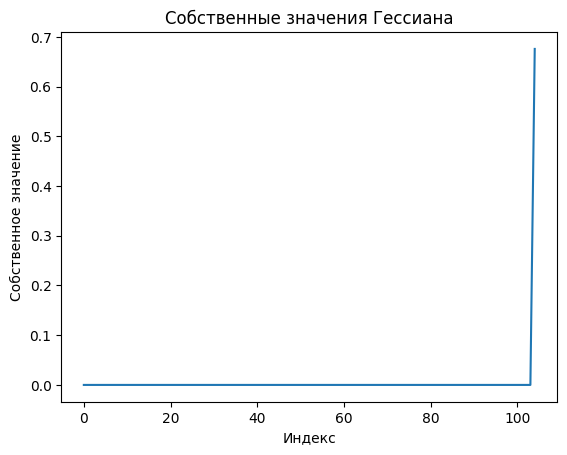

tensor([[ 1.6032e-02, -2.1182e-02,  1.7097e-02, -2.2590e-02,  8.2597e-03,
         -1.0913e-02, -1.7789e-02,  2.3504e-02,  8.4251e-03, -1.1132e-02,
         -1.9826e-02,  2.6196e-02,  5.3033e-03, -7.0071e-03, -2.5398e-03,
          3.3558e-03,  1.7004e-02,  1.8135e-02,  8.7608e-03, -1.8868e-02,
          8.9363e-03, -2.1029e-02,  5.6251e-03, -2.6940e-03,  1.5661e-03,
          5.5897e-04, -1.0903e-02, -4.2762e-03, -3.8418e-03, -1.7552e-03,
          3.8833e-03, -2.1338e-03, -9.4168e-04, -3.3610e-04,  6.5559e-03,
          2.5712e-03,  2.3100e-03,  1.0554e-03, -2.3349e-03,  1.2830e-03,
          2.4647e-03,  8.7969e-04, -1.7159e-02, -6.7297e-03, -6.0461e-03,
         -2.7622e-03,  6.1114e-03, -3.3582e-03,  9.7678e-04,  3.4862e-04,
         -6.8002e-03, -2.6670e-03, -2.3961e-03, -1.0947e-03,  2.4219e-03,
         -1.3309e-03,  2.0711e-03,  7.3920e-04, -1.4419e-02, -5.6549e-03,
         -5.0805e-03, -2.3211e-03,  5.1353e-03, -2.8218e-03, -2.2602e-03,
         -8.0670e-04,  1.5735e-02,  6.

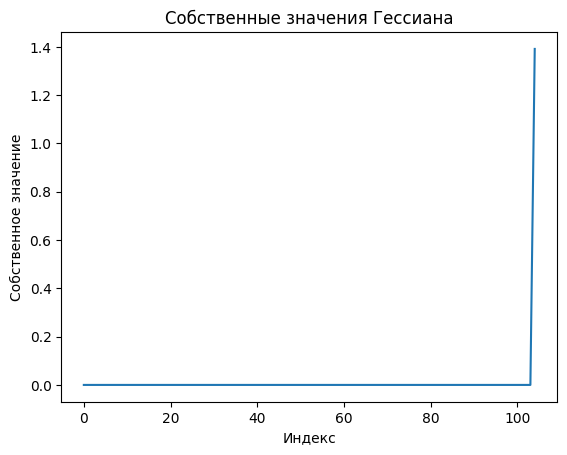

tensor([[ 3.5368e-03,  1.4576e-04,  4.2292e-03,  1.7430e-04,  7.6090e-03,
          3.1359e-04, -3.6351e-03, -1.4981e-04,  5.8790e-03,  2.4229e-04,
         -4.8372e-03, -1.9935e-04,  4.0374e-03,  1.6639e-04, -4.0389e-03,
         -1.6645e-04, -1.9017e-03, -2.2740e-03, -4.0913e-03,  1.9545e-03,
         -3.1611e-03,  2.6009e-03, -2.1709e-03,  2.1716e-03,  5.6021e-03,
          4.6841e-03, -3.4911e-03, -8.8665e-03, -3.9117e-03, -3.7894e-03,
         -5.9962e-03,  4.9538e-03, -4.5189e-03, -3.7784e-03,  2.8161e-03,
          7.1522e-03,  3.1554e-03,  3.0567e-03,  4.8369e-03, -3.9960e-03,
          1.6674e-03,  1.3942e-03, -1.0391e-03, -2.6390e-03, -1.1643e-03,
         -1.1279e-03, -1.7847e-03,  1.4744e-03,  2.7977e-03,  2.3393e-03,
         -1.7435e-03, -4.4280e-03, -1.9535e-03, -1.8925e-03, -2.9946e-03,
          2.4740e-03,  1.2180e-03,  1.0184e-03, -7.5905e-04, -1.9278e-03,
         -8.5048e-04, -8.2390e-04, -1.3037e-03,  1.0771e-03, -3.6045e-06,
         -3.0139e-06,  2.2463e-06,  5.

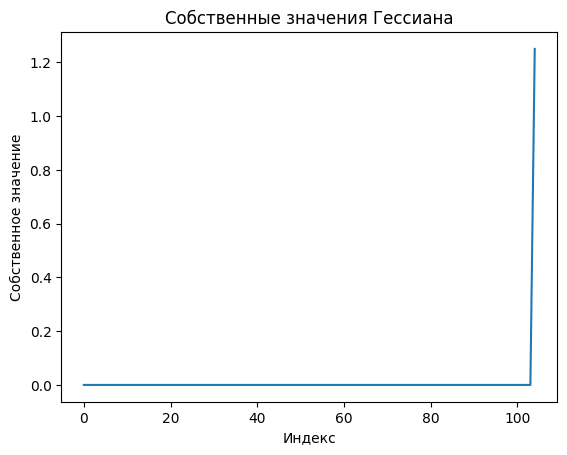

tensor([[ 8.7423e-03,  1.9269e-03,  1.0062e-02,  2.2178e-03,  1.1832e-02,
          2.6080e-03, -9.0294e-03, -1.9902e-03,  1.1989e-02,  2.6426e-03,
         -1.1110e-02, -2.4488e-03,  9.5406e-03,  2.1029e-03, -7.8645e-03,
         -1.7334e-03, -5.2337e-03, -6.0235e-03, -7.0833e-03,  5.4055e-03,
         -7.1775e-03,  6.6511e-03, -5.7116e-03,  4.7081e-03,  7.5492e-03,
          5.9347e-03, -3.9681e-03, -1.1643e-02, -6.2598e-03, -4.6641e-03,
         -1.0070e-02,  7.7274e-03, -6.3784e-03, -5.0143e-03,  3.3527e-03,
          9.8374e-03,  5.2890e-03,  3.9408e-03,  8.5082e-03, -6.5290e-03,
          5.4427e-03,  4.2787e-03, -2.8608e-03, -8.3942e-03, -4.5130e-03,
         -3.3626e-03, -7.2600e-03,  5.5711e-03,  4.7987e-03,  3.7724e-03,
         -2.5223e-03, -7.4009e-03, -3.9790e-03, -2.9647e-03, -6.4009e-03,
          4.9119e-03,  4.2439e-03,  3.3362e-03, -2.2307e-03, -6.5453e-03,
         -3.5190e-03, -2.6220e-03, -5.6609e-03,  4.3440e-03, -9.9344e-06,
         -7.8097e-06,  5.2218e-06,  1.

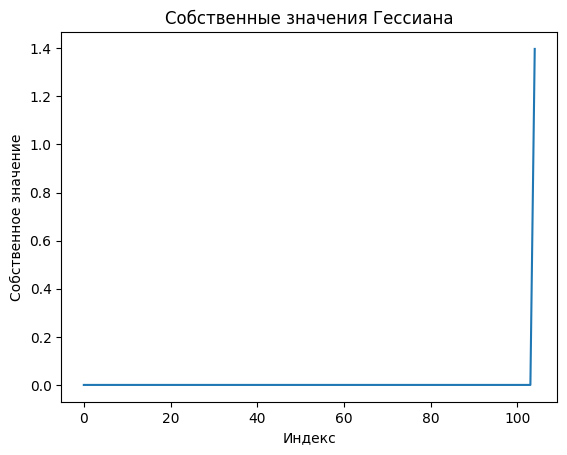

tensor([[ 2.2058e-05, -1.3344e-04, -7.0803e-07,  4.2834e-06,  3.5264e-05,
         -2.1334e-04,  1.1975e-05, -7.2444e-05, -2.2630e-06,  1.3691e-05,
         -3.2456e-06,  1.9635e-05, -3.6109e-05,  2.1845e-04,  2.3765e-05,
         -1.4377e-04, -1.3397e-04,  4.3003e-06, -2.1418e-04, -7.2729e-05,
          1.3745e-05,  1.9713e-05,  2.1931e-04, -1.4434e-04,  2.6069e-06,
          3.8808e-06,  3.6107e-08, -4.4504e-06,  2.9770e-06, -3.0684e-06,
          2.0163e-06,  1.7413e-08, -1.9183e-04, -2.8558e-04, -2.6570e-06,
          3.2749e-04, -2.1907e-04,  2.2580e-04, -1.4838e-04, -1.2814e-06,
          1.1894e-06,  1.7707e-06,  1.6474e-08, -2.0306e-06,  1.3583e-06,
         -1.4000e-06,  9.1998e-07,  7.9449e-09,  2.7561e-04,  4.1030e-04,
          3.8175e-06, -4.7052e-04,  3.1474e-04, -3.2441e-04,  2.1318e-04,
          1.8410e-06,  9.6575e-07,  1.4377e-06,  1.3376e-08, -1.6487e-06,
          1.1029e-06, -1.1367e-06,  7.4698e-07,  6.4509e-09, -3.4568e-05,
         -5.1461e-05, -4.7880e-07,  5.

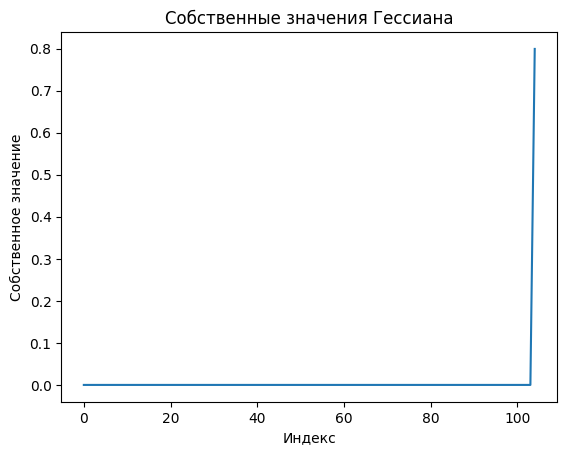

tensor([[ 2.4686e-02,  1.4142e-02,  2.6326e-02,  1.5081e-02,  1.6858e-02,
          9.6574e-03, -2.4389e-02, -1.3971e-02,  2.6465e-02,  1.5160e-02,
         -2.8252e-02, -1.6184e-02,  2.4878e-02,  1.4252e-02, -1.6067e-02,
         -9.2042e-03, -1.6298e-02, -1.7381e-02, -1.1130e-02,  1.6102e-02,
         -1.7472e-02,  1.8652e-02, -1.6425e-02,  1.0608e-02,  5.5057e-03,
          3.5293e-03, -2.0578e-03, -7.9980e-03, -6.7073e-03, -2.5652e-03,
         -1.0952e-02,  7.5060e-03, -7.9894e-03, -5.1214e-03,  2.9861e-03,
          1.1606e-02,  9.7330e-03,  3.7223e-03,  1.5892e-02, -1.0892e-02,
          1.6058e-02,  1.0293e-02, -6.0017e-03, -2.3327e-02, -1.9562e-02,
         -7.4815e-03, -3.1941e-02,  2.1892e-02,  8.0696e-03,  5.1728e-03,
         -3.0161e-03, -1.1722e-02, -9.8307e-03, -3.7597e-03, -1.6051e-02,
          1.1001e-02,  1.4293e-02,  9.1624e-03, -5.3423e-03, -2.0763e-02,
         -1.7413e-02, -6.6594e-03, -2.8431e-02,  1.9486e-02, -2.5497e-05,
         -1.6344e-05,  9.5296e-06,  3.

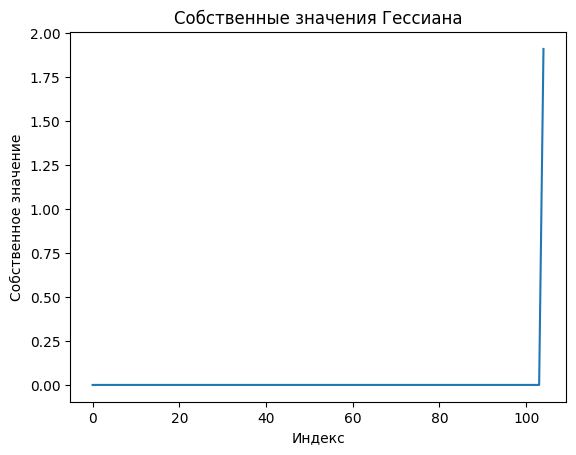

In [23]:
for i in range(len(X_train)):
    output = model(X_train[i])
    hessian = hc.hessian_wrt_params(X_train[i], output)
    print(hessian)
    print(compute_eigen_of_hessian(hessian))
    visualize_curvature(hessian)

    if i == 5:
        break

# ПО ВХОДУ

tensor([[ 0.0452, -0.0128],
        [-0.0128,  0.0036]])
tensor([6.9849e-10, 4.8798e-02])


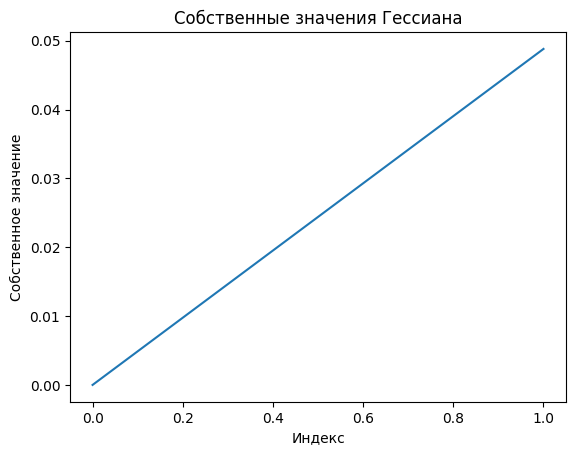

tensor([[ 0.0129, -0.0593],
        [-0.0593,  0.2724]])
tensor([-1.8626e-09,  2.8527e-01])


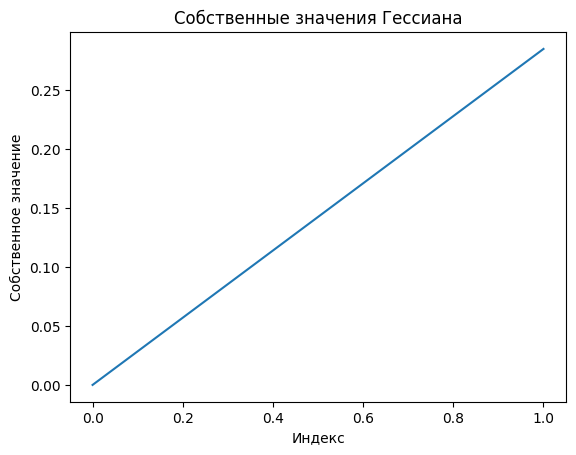

tensor([[0.0127, 0.0212],
        [0.0212, 0.0353]])
tensor([9.3132e-10, 4.7976e-02])


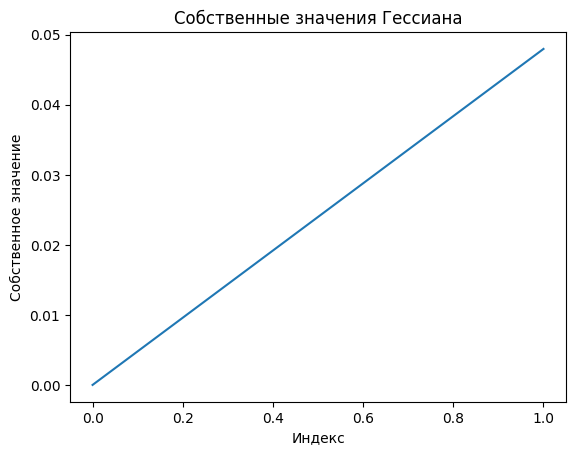

tensor([[0.0156, 0.0396],
        [0.0396, 0.1006]])
tensor([-5.5879e-09,  1.1626e-01])


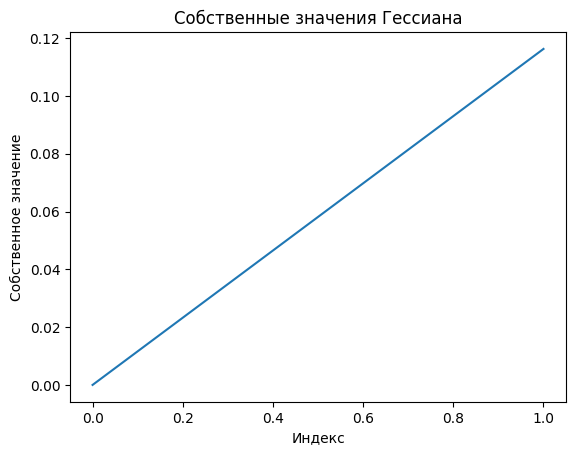

tensor([[0.0008, 0.0028],
        [0.0028, 0.0095]])
tensor([-1.1642e-10,  1.0301e-02])


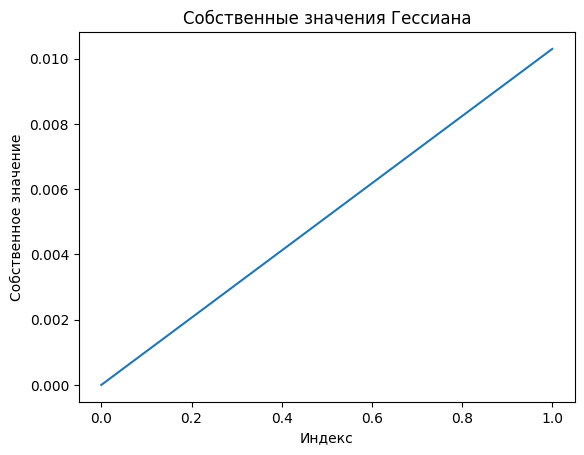

tensor([[0.0128, 0.0616],
        [0.0616, 0.2973]])
tensor([-5.5879e-09,  3.1006e-01])


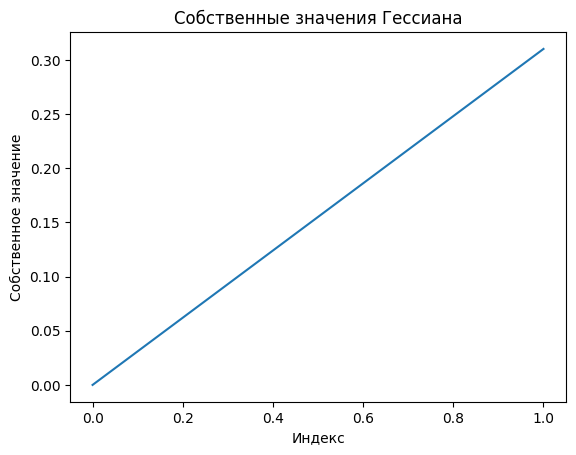

In [24]:
for i in range(len(X_train)):
    output = model(X_train[i])
    hessian = hc.hessian_wrt_inputs(X_train[i], output)
    print(hessian)
    print(compute_eigen_of_hessian(hessian))
    visualize_curvature(hessian)

    if i == 5:
        break

# ПО СЛОЯМ - ПАРАМЕТРЫ

In [25]:
from hessian.layer_wise_hessian import compute_local_hessians_for_chunks

hess = compute_local_hessians_for_chunks(model, X_train[0])

for name, i in hess.items():
    print(f"Chunk idx {name} and hessian of layer chunk {i}")
    print(f"Eigenvalue of {name}'th hessian {compute_eigen_of_hessian(i)}")
    print("=" * 80)

Chunk idx 0 and hessian of layer chunk tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       

# Веса сети

In [26]:
for name, param in model.named_parameters():
    print(f"{name}:")
    print(param.data)
    print("="*50)

layer.weight:
tensor([[ 0.6133, -0.4250],
        [ 0.2781, -0.7954],
        [-0.9888,  0.4318],
        [-1.0056,  0.8824],
        [-1.1159, -0.9031],
        [-0.2870,  0.7075],
        [-1.0042, -1.2867],
        [ 0.6720,  0.5097]])
layer.bias:
tensor([-0.8086, -1.1463, -0.6114,  1.2310, -0.8063,  0.8169,  0.0853, -0.4060])
layer2.weight:
tensor([[ 0.1999,  0.5760,  0.7218, -0.6325,  0.6263, -0.6838,  0.6835, -0.7944],
        [-0.0345,  0.1008, -0.4869, -0.2116,  0.0126, -0.0246,  0.2770, -0.3312],
        [ 0.5332,  0.7676,  0.1747, -0.8514,  0.8088, -0.7901,  0.6085, -0.2877],
        [ 0.1271, -0.0135,  0.2947,  0.4579,  0.4611,  0.1795, -0.1999,  0.0653],
        [ 0.7658,  0.7263,  0.1000, -0.6911,  0.3359, -0.8381,  0.8837, -0.5756],
        [-0.5469, -0.6086,  0.1796,  0.6942,  0.3719,  0.7359,  0.7368, -0.7429],
        [-0.1133,  0.3896, -0.2370,  0.1186,  0.2897, -0.4241, -0.0723,  0.1722],
        [-0.5632, -0.0878, -0.5178,  0.1819,  0.5948,  0.3995,  0.8584, -0.5091

=== Спектральный анализ: Layer 0 ===
Минимальное собственное значение: 0.000000
Максимальное собственное значение: 0.000000
Среднее собственное значение: 0.000000
Стандартное отклонение: 0.000000
Число отрицательных значений: 0


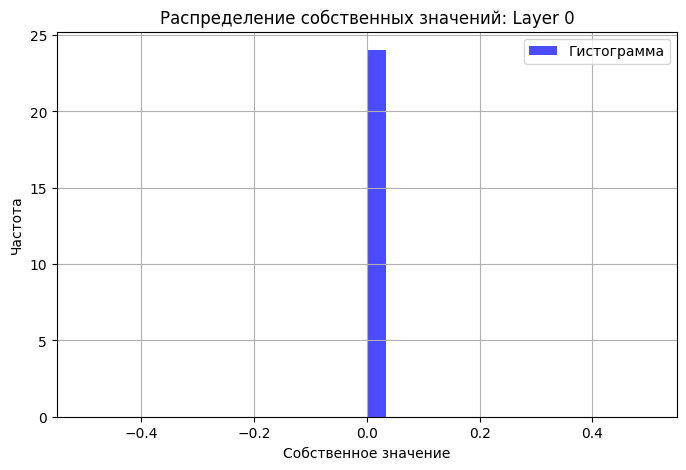

[Предупреждение] KDE не может быть построена для слоя 'Layer 0': The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principal component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.
=== Спектральный анализ: Layer 1 ===
Минимальное собственное значение: -0.399493
Максимальное собственное значение: 0.607009
Среднее собственное значение: 0.012673
Стандартное отклонение: 0.117522
Число отрицательных значений: 32


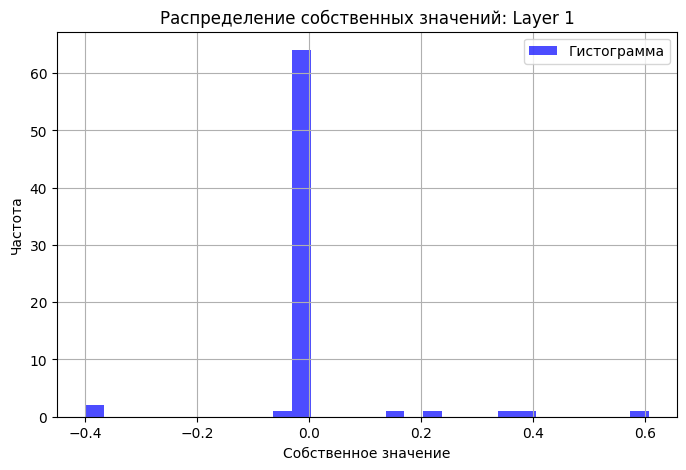

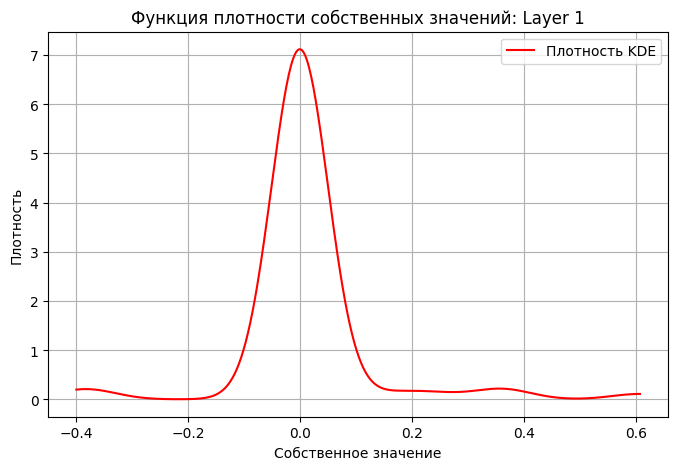

=== Спектральный анализ: Layer 2 ===
Минимальное собственное значение: -0.083982
Максимальное собственное значение: 0.000000
Среднее собственное значение: -0.009331
Стандартное отклонение: 0.026393
Число отрицательных значений: 6


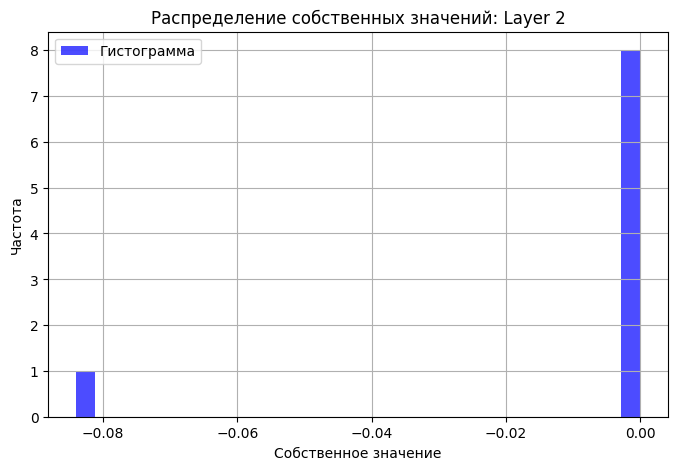

In [27]:
from hessian.hessian_analysis import spectral_analysis, compute_condition_number

hess_list = list(hess.values())

spectral_analysis(hess_list, None)

In [28]:
compute_condition_number(hess_list)

=== Число обусловленности для Layer 0 ===
λ_min: 0.000000, λ_max: 0.000000, κ: inf
=== Число обусловленности для Layer 1 ===
λ_min: -0.399493, λ_max: 0.607009, κ: -1.5194486379623413
=== Число обусловленности для Layer 2 ===
λ_min: -0.083982, λ_max: 0.000000, κ: -1.9243387328060635e-08


{'Layer 0': inf,
 'Layer 1': np.float32(-1.5194486),
 'Layer 2': np.float32(-1.9243387e-08)}